# Mobile App Behavior Analysis Part 1

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization
from dateutil import parser

In [68]:
# Import appdata.csv file. I have used the dataframe as df but you can choose whatever name 
# but you just have to careful with the code
import io
dataframe = pd.read_csv("appdata.csv")

# Exploratory Data Analysis

In [69]:
dataframe.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,14:51.3,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,16:00.9,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,19:09.2,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,08:46.4,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,11:49.5,0
4,51549,50:48.7,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,56:37.8,1


In [70]:
# Use the info, describe and head function to check the dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [90]:
dataframe.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


Q. Why is hour column not in the list of the describe function?

It is not in the list Because hour columns's data type is object so we need to convert in into numeric. 

In [91]:
# Just check for hour column separately 
dataframe.hour.head()

0     02:00:00
1     01:00:00
2     19:00:00
3     16:00:00
4     18:00:00
Name: hour, dtype: object

# Data Pre-processing

In [93]:
#  Write code to check for all the missing values
dataframe.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [94]:
# Change hour variable to integer using the slice function and update the dataframe
appdata1['hour'] = pd.to_numeric(appdata1['hour'])
#appdata1.hour.str.slice(0,3).astype(int)

ValueError: Unable to parse string " 02:00:00" at position 0

In [88]:
appdata1.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,<NA>,23,15,0,0,0
1,6,<NA>,24,13,0,0,0
2,1,<NA>,23,3,0,1,1
3,4,<NA>,28,40,0,0,0
4,1,<NA>,31,32,0,0,1


In [89]:
appdata1=dataframe.drop(columns=['enrolled', 'user','screen_list','enrolled_date', 'first_open'])

In [77]:
appdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   dayofweek             50000 non-null  int64 
 1   hour                  50000 non-null  object
 2   age                   50000 non-null  int64 
 3   numscreens            50000 non-null  int64 
 4   minigame              50000 non-null  int64 
 5   used_premium_feature  50000 non-null  int64 
 6   liked                 50000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 2.7+ MB


## Plots

ValueError: hist method requires numerical columns, nothing to plot.

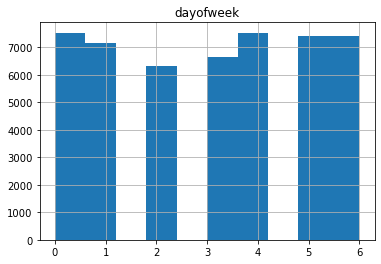

In [78]:
# The simple way
for i in appdata1.columns:   
        appdata1.hist(i)

### Q. What do you observe

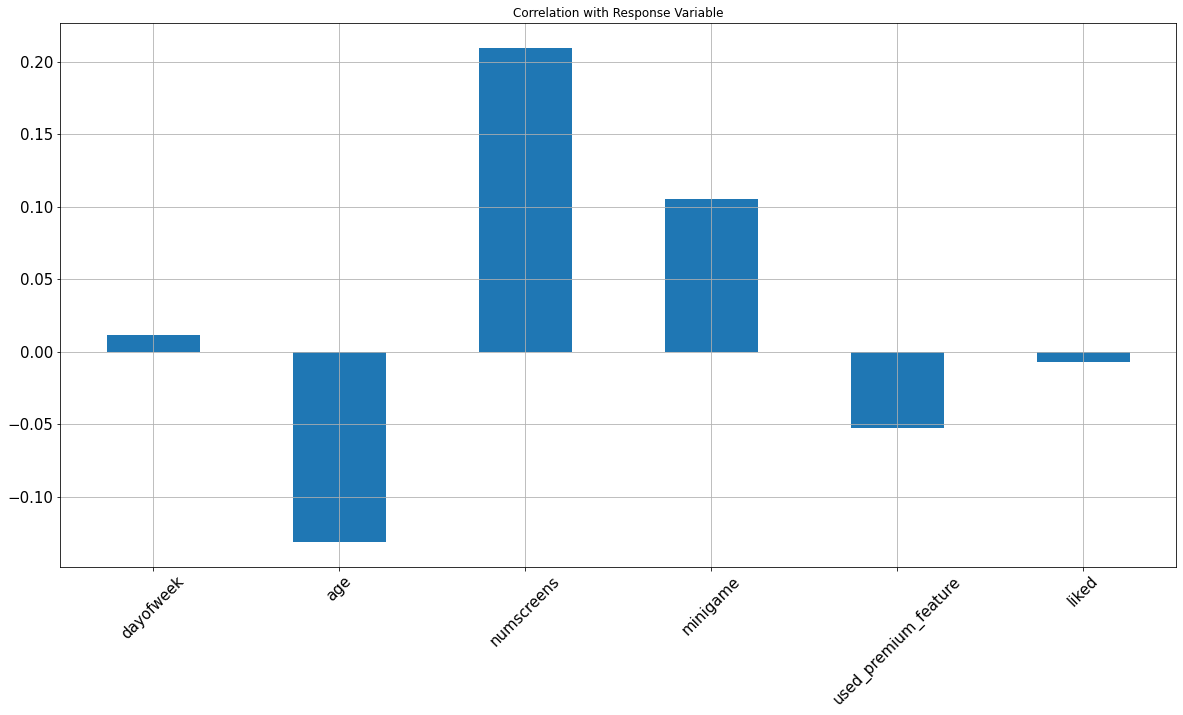

In [ ]:
# Correlation Plot with the Response variable
appdata1.corrwith(dataframe.enrolled).plot.bar(figsize = (20, 10), title = 'Correlation with Response Variable', 
                                   fontsize = 15, rot = 45, grid = True)

### Q. Comment on the plot

# Correlation Plot the nicer way

In [ ]:
# Set Background
sns.set(style = 'white', font_scale =2)
# Compute the matrix
corr = appdata1.corr()
# Generate the mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [ ]:
mask

array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]])

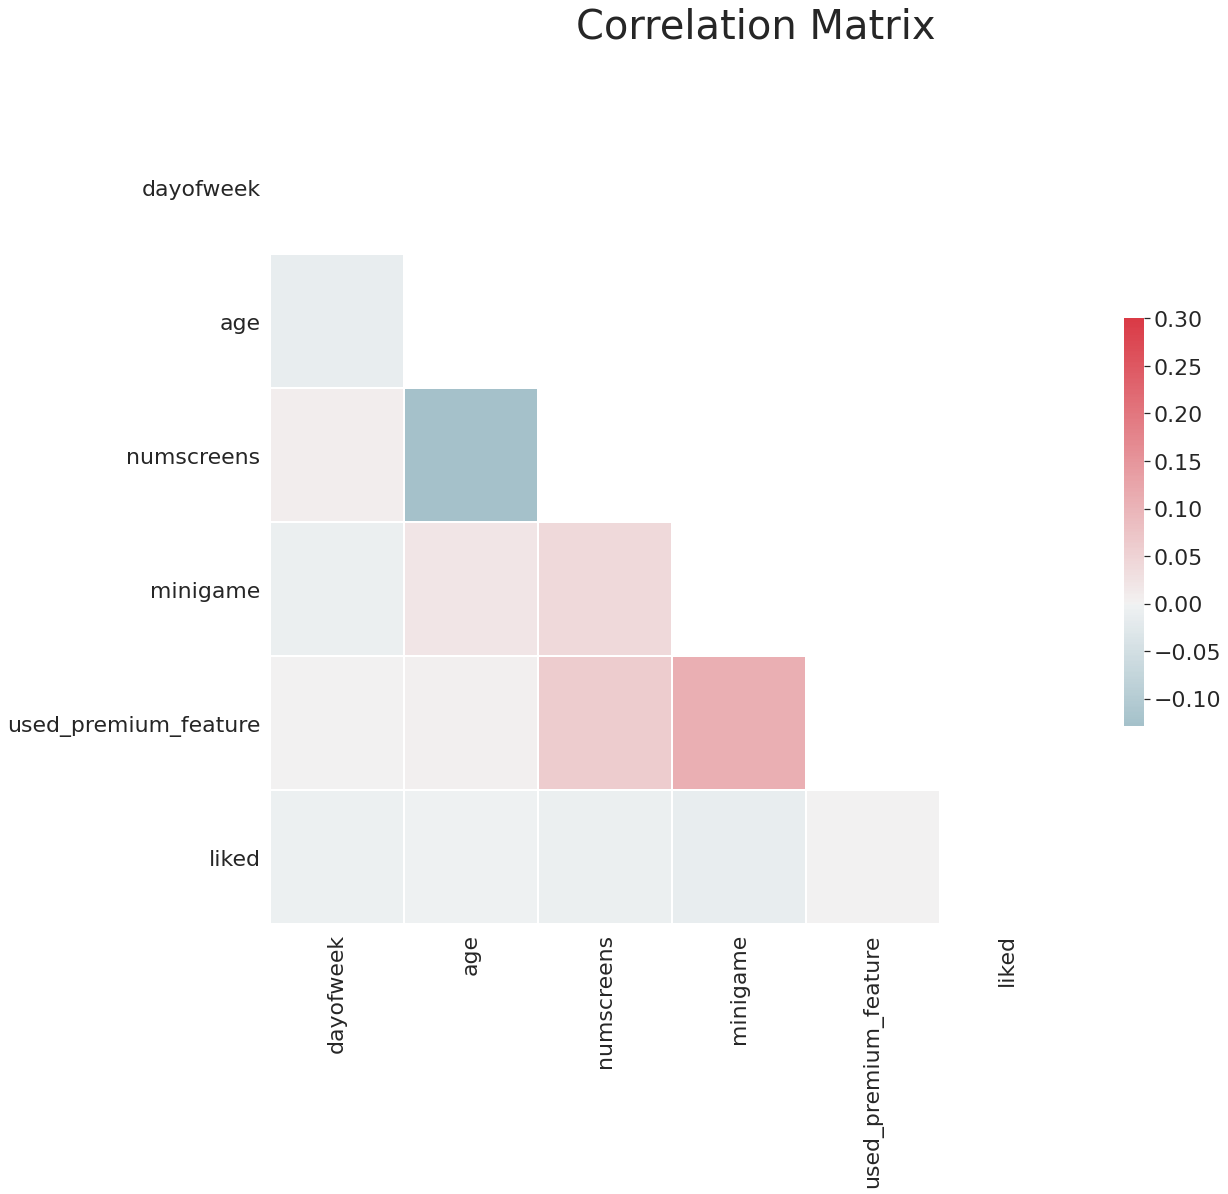

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#Create a heat map of correlation matrix by using the same code from the first project and tweaking it
# Should look something like what you see below

# Q. Comment on the heat map

# Feature Engineering Process

# Fine tune the response variable

In [47]:
dataframe.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object